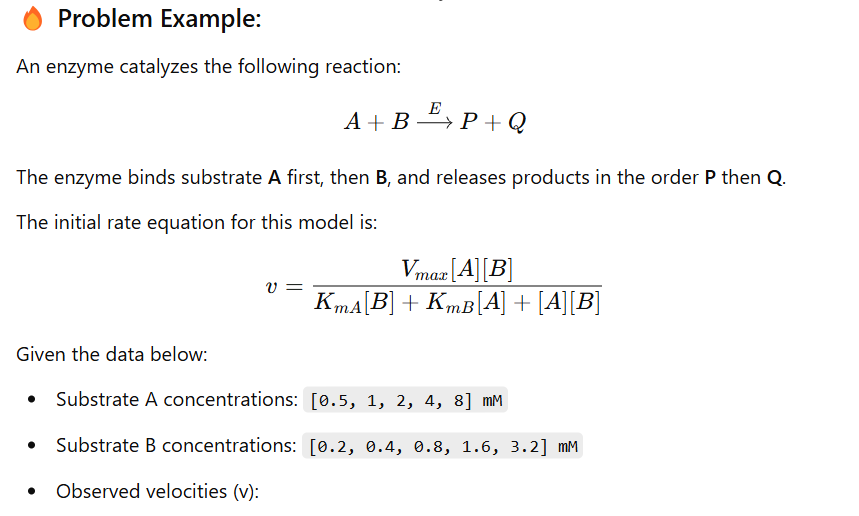
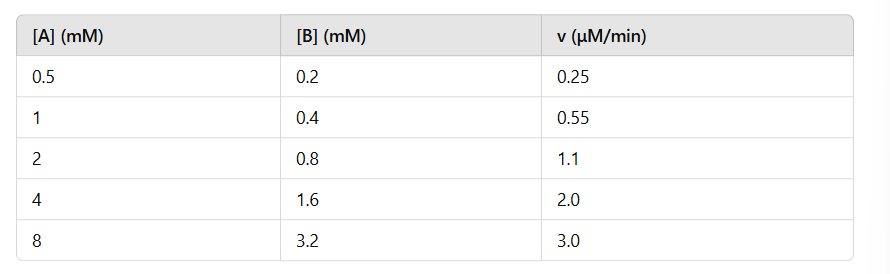
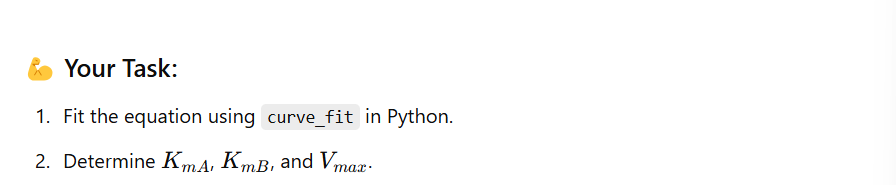

In [1]:
import numpy as np

A = np.array([0.5, 1, 2, 4, 8]) #mM
B = np.array([0.2, 0.4, 0.8, 1.6, 3.2]) #mM
v = np.array([0.25, 0.55, 1.1, 2.0, 3.0]) #μM/min

Vmax = 7.08961721264002
KmA = 6.150062322310719
KmB = 1.8366423243066878


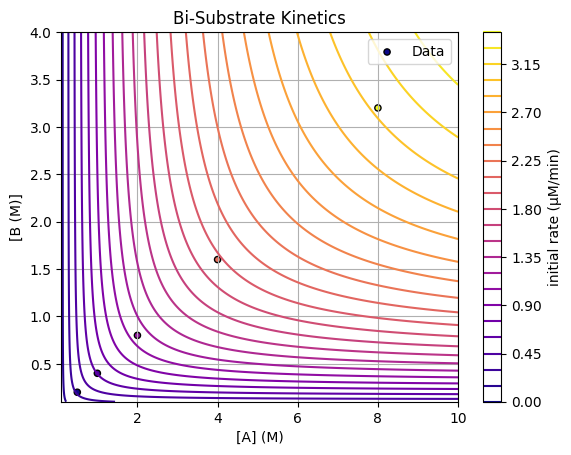

In [15]:
from scipy.optimize import curve_fit
def func_v(A_B, Vmax, KmA, KmB):
    A,B=A_B
    return Vmax*A*B/(KmA*B+KmB*A+A*B)
popt, pcov = curve_fit(func_v, (A,B), v,p0=(3,1,1), bounds=(0,np.inf))
Vmax, KmA, KmB = popt
print(f'Vmax = {Vmax}\nKmA = {KmA}\nKmB = {KmB}')

A1 = np.linspace(0.1,10,1000)
B1 = np.linspace(0.1,4,1000)
A1, B1 = np.meshgrid(A1, B1)
v1 = func_v((A1,B1),Vmax, KmA, KmB)


import matplotlib.pyplot as plt
plt.scatter(A,B,c=v,label='Data', cmap='plasma', s=20, edgecolors='k')
plt.contour(A1, B1, v1, levels=25,cmap='plasma')
plt.colorbar(label='initial rate (μM/min)')
plt.grid(True)
plt.ylabel('[B (M)]')
plt.xlabel('[A] (M)')
plt.title('Bi-Substrate Kinetics')
plt.legend();